This research was enspired by [this wideo](https://www.youtube.com/watch?v=3LopI4YeC4I)

In [1]:
import pandas as pd
import numpy as np
from  matplotlib import pyplot as plt
import random
%matplotlib inline
pd.set_option("compute.use_bottleneck", True)
pd.set_option("compute.use_numexpr", True)

# In this section, we will simulate an additive model of luck influence

The model is as follows:
You have a skill that at normal conditions (luck = 0) performs a result that equals to **skill_performance**.

**Skill_performance** - numerical(absolute) value (e.g. 5, 10, 97). The expected outcome of applying your skill with no(0) luck. I assumed that 95% of skill applications will produce outcome 100 or less.

If luck happened to influence this action then the result will be **skill_performance** + **luck_size**, positive values of luck mean actually luck.

Negative values of luck mean you are unlucky and the outcome of your skill will be lower than **skill_performance** by the value of **luck_size**.

**luck_size** - range [-100:+100], numeric(absolute) value (e.g. 5, -10, 97) that will be added to **skill_performance**. I chose this range because train/truck/lightning can hit you (very big unluck (-100) and then no level of **skill_performance** will help you to produce any outcome of your skill. Win a jackpot - big luck (100), find a dollar - small luck(1), louse a million - very unlucky (-100), lost a dollar - unluck (-1)

**Luck_chanse** - depends on luck_size and determines whether or not luck influences skill_performance.

In this simulation, we also assume that skill performance have a normal distribution in the selected population

let's conduct a simulation for population size = 10000 people

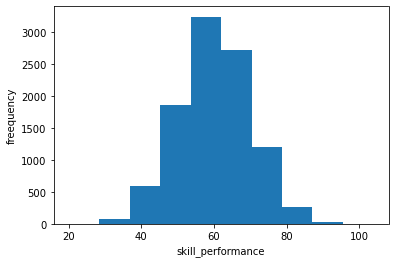

In [2]:
# population simulation parameters:
population_size = 10000
skill_performance_mean = 60
skill_performance_std = 10
# generate random set of skill_performance
population_df = pd.DataFrame()
population = np.random.normal(skill_performance_mean, scale = skill_performance_std, size = population_size)
population_df['person_id'] = range(population_size)
population_df['skill_performance'] = population
columns = population_df.columns
# plot skill_performance distrubution in the population
plt.hist(population)
plt.xlabel('skill_performance')
plt.ylabel('freequency')
plt.show()

let's simulate luck

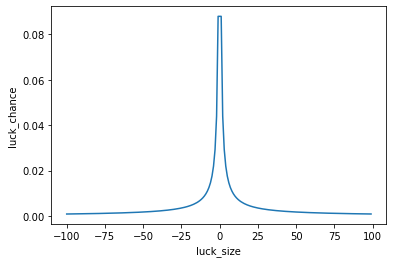

In [3]:
# the main idea here is that the bigger luck_size the less luck_chance it to happen.
luck_size = np.arange(-100,100)
luck_chance = 0
luck_chances = []
for luck in luck_size:
    if luck != 0:
# here idea is that summ of all luck_chances should be equel to 1. that is where 201*5.6541069827259935 came from
# there should be more elegant way to do this, but this is what I came up with
        luck_chance = (100/abs(luck))/(201*5.6541069827259935) # 1/(abs(luck)/100)/(201*5.6541069827259935)
        luck_chances += [luck_chance]
    else:
        luck_chances += [100/(201*5.6541069827259935)]
        continue
#print(sum(luck_chances))
# plot luck_chanse vs luck_size
plt.clf()
plt.plot(luck_size, luck_chances)
plt.xlabel('luck_size')
plt.ylabel('luck_chance')
plt.show()

apply luck to skill_performance

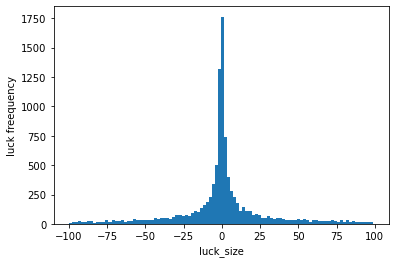

In [4]:
# next line of code simulate 10000 luck occurrences based on luck_size and luck chances
add_luck_distrubution = np.random.choice(luck_size, size = 10000, p = luck_chances)

# plot luc_size distribution to make sure it make sense
plt.clf()
plt.hist(add_luck_distrubution, bins = 100)
plt.xlabel('luck_size')
plt.ylabel('luck freequency')
plt.show()

# function that apply 1 luck occurrences to 1 skill_performance
def addluck(skill_performance):
    return float(skill_performance + np.random.choice(luck_size, size = 1, p = luck_chances))

let's simulate influence of luck on skill_performance for entire population:

In [5]:
skill_performance_affected_by_luck = population_df.skill_performance.apply(addluck)
population_df['+luck'] = skill_performance_affected_by_luck
population_df['amount_of_luck'] = population_df['+luck'] - population_df['skill_performance']

Compare distributions of skill_performance and skill_performance affected by luck

<Figure size 432x288 with 0 Axes>

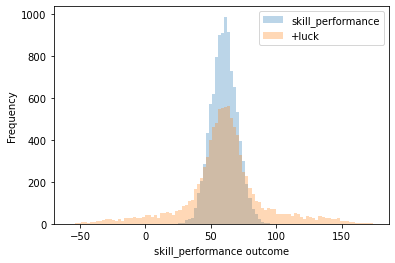

In [6]:
plt.clf()
population_df.drop(columns=['person_id', 'amount_of_luck']).plot.hist(alpha = .3, bins=100)
plt.xlabel('skill_performance outcome')
plt.show()

I would say that result is expected, luck widen range of possible outcome (bigger std - result less predictable)

In [7]:
# descriptive statistic:
population_df.describe()

,person_id,skill_performance,+luck,amount_of_luck
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,60.095245,60.112045,0.016800
std,2886.89568,9.805694,30.593192,29.061428
min,0.00000,20.106438,-58.515978,-100.000000
25%,2499.75000,53.533869,48.245250,-6.000000
50%,4999.50000,60.176507,60.250526,0.000000
75%,7499.25000,66.675669,71.872572,6.000000
max,9999.00000,103.856763,174.305106,99.000000


### Imagine we have a competition where only those participants rewarded whose result(skill_performance + luck) is greater than 90.

First let's find how many people of population (10 000) actually have skill performance > 90:

In [8]:
skill_performance_90 = population_df[population_df.skill_performance >=90]
#print(skill_performance_90)
print('\nNumber of people with skill_performance >= 90 is ', len(skill_performance_90))
print('So if there were no luck only', len(skill_performance_90), 'people of population would get reward')


Number of people with skill_performance >= 90 is  10
So if there were no luck only 10 people of population would get reward


Now let's find out how many people would be rewarded if luck happens to influence outcome according to our model.

In [9]:
luck_90 = population_df[population_df['+luck'] >=90]
#print(luck_90)
print('\nNumber of people who get rewarded with luck influence is ', len(luck_90))


Number of people who get rewarded with luck influence is  1114


In [10]:
print("Wow! that's huge compare to", len(skill_performance_90), 'trully skilled people')

Wow! that's huge compare to 10 trully skilled people


Interesting to know how many lucky (whose skill_performance <90 but they still got reward) guys there was

In [11]:
lucky_guys = population_df[(population_df.skill_performance <90) & (population_df['+luck'] >=90)]
#print(lucky_guys)
print('\nNumber of "lucky guys" is ', len(lucky_guys))


Number of "lucky guys" is  1108


Let's check if there were some unlucky guys

In [12]:
unlucky_guys = population_df[(population_df.skill_performance >=90) & (population_df['+luck'] <=90)]
#print(unlucky_guys)
print('\nNumber of "unlucky guys" is ', len(unlucky_guys))


Number of "unlucky guys" is  4


****Look at that number! Only around 1/3 of people got *really* unlucky (they were supposed to get a reward but luck played against them). So in most cases when someone says 'luck played against me' in fact he got lucky, just luck_size was not big enough to reach the goal. Or it's skill_performance was too low to reach a goal at this luck level?****

In [13]:
extremely_unlucky_guys = population_df[population_df['+luck'] <=0]
#print(extremely_unlucky_guys)
print('\nNumber of "extremely_unlucky_guys" is ', len(extremely_unlucky_guys))


Number of "extremely_unlucky_guys" is  431


I interpret the negative outcome as one wanted to but did not take part in the competition: missed a train, got flat tire, hit by a truck ...

### Now imagine that competition consists of few tasks and the cumulative outcome of them determines whether participants deserve a reward or not..

winners_count [1151, 973, 656, 474, 383, 285, 248, 190, 176, 155, 137, 114, 99, 90, 86, 83, 76, 66, 66, 61, 60, 52, 50, 52, 55, 49, 50, 47, 43, 36, 35, 35, 33, 33, 32, 32, 31, 30, 27, 28, 30, 30, 30, 28, 27, 26, 25, 27, 27, 25, 24, 27, 25, 25, 28]


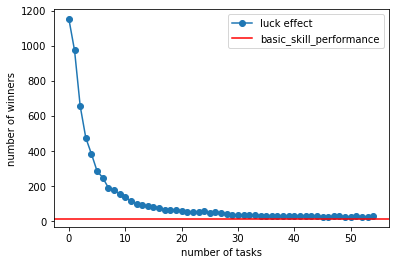

In [14]:
# WARNING for large values (> 55) of task it may take up to 30 sec. to perform calculations
tasks = 55 # number of tasks in competition
population_df = population_df.loc[:,['person_id','skill_performance']]

# Simulate influence of luck on skill_performance on each task
for task in range(tasks): 
    skill_performance_affected_by_luck = population_df.skill_performance.apply(addluck)
    new_column_title = '+luck {}'.format(task)
    population_df[new_column_title] = skill_performance_affected_by_luck

# Calculate number of winners after each task
columns = population_df.columns[2:]
population_df['total_luck'] = 1.0
winners_count = []
for i, column in enumerate(columns):
        population_df['total_luck'] += population_df[column]
        total_luck_270 = population_df.total_luck[population_df.total_luck >= 90 * (i + 1)].count()
        winners_count += [total_luck_270]
print('winners_count',winners_count)

# plot graph 
basic_skill_performance =  population_df.skill_performance[population_df.skill_performance > 90].count()
plt.plot(range(tasks), winners_count, marker='o', label='luck effect')
plt.axhline(y=basic_skill_performance, color='r', linestyle='-', label='basic_skill_performance')
plt.xlabel('number of tasks')
plt.ylabel('number of winners')
plt.legend()
plt.show()

basic_skill_performance - amount of people whose skill_performance >=90
The graph shows that in long run - luck strongly loses its power approaching basic_skill_performance. Nevertheless, even after 10 consecutive repeats, there are still a lot of people who simply get lucky. 
- It is enough to repeat the check 3 - 4 times to reduce luck influence by around half.
- after 50 tasks more than 20 people deserve reward while only around 10 have skill_performance >=90 so luck is still there

In [15]:
skill_performance_90 = population_df[population_df.skill_performance >=90]
#print(skill_performance_90.iloc[:,[0,1,-1]])
print('\nNumber of people whouse skill_performance >=90 is ', len(skill_performance_90))


Number of people whouse skill_performance >=90 is  10


In [16]:
total_luck_90xtasks = population_df[population_df.total_luck >=90*len(columns)]
#print(total_luck_90xtasks.iloc[:,[0,1,-1]])
print('\nNumber of people whouse comulative skill_performance after', tasks, 'tasks', '>=', 90*tasks, '(90*tasks)', 'is ', len(total_luck_90xtasks))


Number of people whouse comulative skill_performance after 55 tasks >= 4950 (90*tasks) is  28


After 55 consecutive checks, 24 people got a reward that is 2.5 times more than there were skillful people(skill performance >=90). 2 of 9 skillful people did not get a reward.

### Influence of population base parameters (population_size, skill_performance_mean)

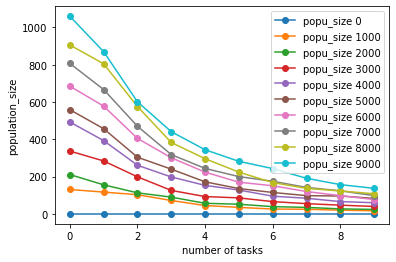

In [17]:
# infvluence of population_size:
winners_count_df = pd.DataFrame()
for i in range(0,10000,1000):
    
    # population simulation parameters:
    population_size = i
    skill_performance_mean = 60
    skill_performance_std = 10
    
    # generate random set of skill_performance
    population_df = pd.DataFrame()
    population = np.random.normal(skill_performance_mean, scale = skill_performance_std, size = population_size)
    population_df['person_id'] = range(population_size)
    population_df['skill_performance'] = population
    columns = population_df.columns
    
    tasks = 10 # number of tasks in competition
    population_df = population_df.loc[:,['person_id','skill_performance']]

# Simulate influence of luck on skill_performance on each task
    for task in range(tasks): 
        skill_performance_affected_by_luck = population_df.skill_performance.apply(addluck)
        new_column_title = '+luck {}'.format(task)
        population_df[new_column_title] = skill_performance_affected_by_luck

# Calculate number of winners after each task
    columns = population_df.columns[2:]
    population_df['total_luck'] = 1.0
    winners_count = []
   
    for j, column in enumerate(columns):
        population_df['total_luck'] += population_df[column]
        total_luck_270 = population_df.total_luck[population_df.total_luck >= 90 * (j + 1)].count()
        winners_count += [total_luck_270]
    #print('winners_count', winners_count)
    new_column_title = 'popu_size {}'.format(i)
    winners_count_df[new_column_title] = winners_count


# plot graph 
basic_skill_performance =  population_df.skill_performance[population_df.skill_performance > 90].count()
for column in winners_count_df.columns:
    plt.plot(range(tasks), winners_count_df[column], marker='o', label= column)
plt.xlabel('number of tasks')
plt.ylabel('population_size')
plt.legend()
plt.show()

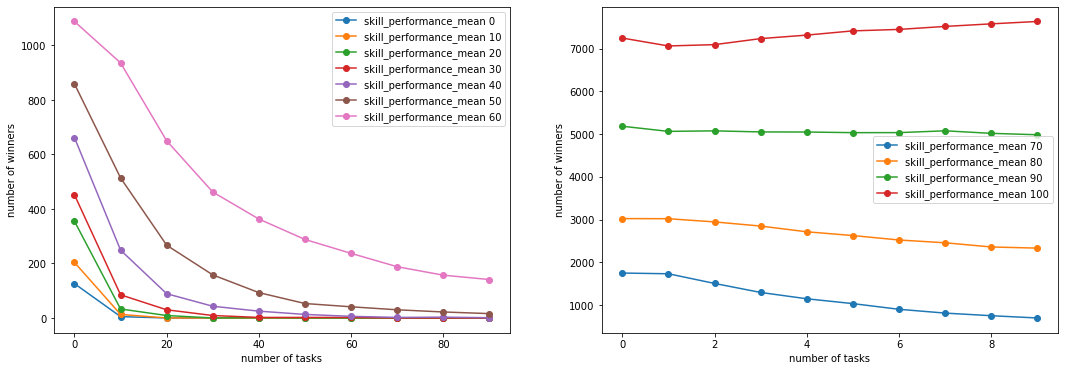

In [18]:
# infvluence of skill_performance_mean:
winners_count_df = pd.DataFrame()
for i in range(0,110,10):
    
    # population simulation parameters:
    population_size = 10000
    skill_performance_mean = i
    skill_performance_std = 10
    
    # generate random set of skill_performance
    population_df = pd.DataFrame()
    population = np.random.normal(skill_performance_mean, scale = skill_performance_std, size = population_size)
    population_df['person_id'] = range(population_size)
    population_df['skill_performance'] = population
    columns = population_df.columns
    
    tasks = 10 # number of tasks in competition
    population_df = population_df.loc[:,['person_id','skill_performance']]

# Simulate influence of luck on skill_performance on each task
    for task in range(tasks): 
        skill_performance_affected_by_luck = population_df.skill_performance.apply(addluck)
        new_column_title = '+luck {}'.format(task + 1)
        population_df[new_column_title] = skill_performance_affected_by_luck

# Calculate number of winners after each task
    columns = population_df.columns[2:]
    population_df['total_luck'] = 1.0
    winners_count = []
   
    for j, column in enumerate(columns):
        population_df['total_luck'] += population_df[column]
        total_luck_270 = population_df.total_luck[population_df.total_luck >= 90 * (j + 1)].count()
        winners_count += [total_luck_270]
    #print('winners_count', winners_count)
    new_column_title = 'skill_performance_mean {}'.format(i)
    winners_count_df[new_column_title] = winners_count


# plot graph 
fig= plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
for column in winners_count_df.columns[0:7]:
    plt.plot(range(0,100,10), winners_count_df[column], marker='o', label= column)
plt.xlabel('number of tasks')
plt.ylabel('number of winners')
plt.legend()

plt.subplot(1,2,2)
for column in winners_count_df.columns[7:11]:
    plt.plot(range(tasks), winners_count_df[column], marker='o', label= column)
plt.xlabel('number of tasks')
plt.ylabel('number of winners')
plt.legend()
plt.show()

The graph above shows that the population with high skill_performance_mean (right graph) are less vulnerable to luck influence while the population with low skill_performance_mean (left graph) are strongly vulnerable to luck influence. On the left graph, one can see that for the population with average skill performance equal to 0 there are still some winners at the first task. Seems to be an interesting case, let's investigate it:

[115, 3, 0, 0, 0, 0, 0, 0, 0, 0]


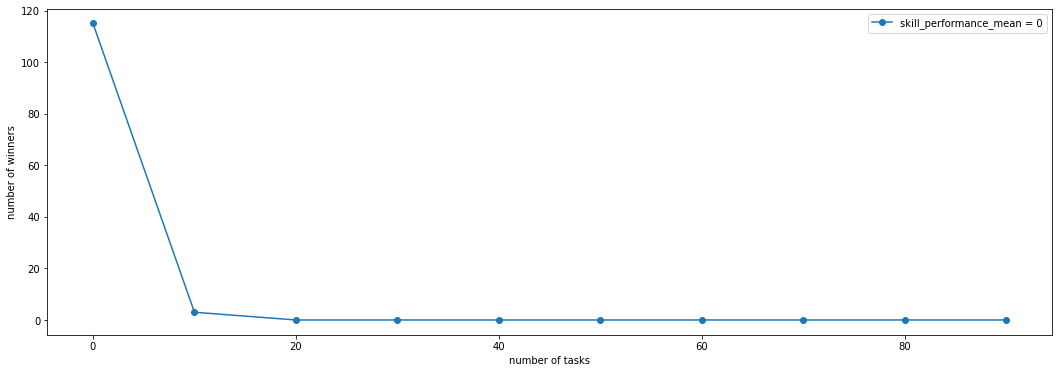

In [19]:
# infvluence of skill_performance_mean:
winners_count_df = pd.DataFrame()    
# population simulation parameters:
population_size = 10000
skill_performance_mean = 0
skill_performance_std = 10
    
# generate random set of skill_performance
population_df = pd.DataFrame()
population = np.random.normal(skill_performance_mean, scale = skill_performance_std, size = population_size)
population_df['person_id'] = range(population_size)
population_df['skill_performance'] = population
columns = population_df.columns
    
tasks = 10 # number of tasks in competition
population_df = population_df.loc[:,['person_id','skill_performance']]

# Simulate influence of luck on skill_performance on each task
for task in range(tasks): 
    skill_performance_affected_by_luck = population_df.skill_performance.apply(addluck)
    new_column_title = '+luck {}'.format(task + 1)
    population_df[new_column_title] = skill_performance_affected_by_luck

# Calculate number of winners after each task
columns = population_df.columns[2:]
population_df['total_luck'] = 1.0
winners_count = []
   
for j, column in enumerate(columns):
    population_df['total_luck'] += population_df[column]
    total_luck_270 = population_df.total_luck[population_df.total_luck >= 90 * (j + 1)].count()
    winners_count += [total_luck_270]
print(winners_count)
# plot graph 
fig= plt.figure(figsize=(18,6))

plt.subplot(1,1,1)
plt.plot(range(0,100,10), winners_count, marker='o', label= 'skill_performance_mean = 0')
plt.xlabel('number of tasks')
plt.ylabel('number of winners')
plt.legend()

It clearly make some sence: amoung population with skill_performance_mean = 0 there are some people with skill_performance > 0 who can be wery lucky and perform good result but it can happens only few times in a row.

### Instead of final word

Everyone kan make his owen conclusions.
found a mistake/bug - contact me by e mail: mykola1987@gmail.com
have a question or proposition - contact me by e mail: mykola1987@gmail.com